# Part II - Loan Features that affects Borrowers APR
## by Omolayo Ipinsanmi


## Investigation Overview

This investigation looks into the factors that affects borrowers APR. I will look into Loan term, Prosper Rating and Loan original amount as they affect the borrower APR


## Dataset Overview
The dataset contains 81 features of which ten were selected for this project. Of the ten selected, loan original amount and term are int64 data type, Occupation, BorrowerState, ProsperRating (Alpha) and EmploymentStatus are object type data while the remaining 4, BorrowerAPR, StatedMonthlyIncome, MonthlyLoanPayment and BorrowerRate are floats data type. The objects data are categorical data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
df_loan= pd.read_csv('ProsperLoanData.csv')

#select needed variables
feats = ['LoanOriginalAmount', 'Occupation', 'BorrowerAPR', 'StatedMonthlyIncome', 'BorrowerState','Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus','MonthlyLoanPayment','BorrowerRate']
df_new= df_loan[feats]
# Remove loans with missing borrower APR information
df_new_clean = df_new[~df_new.BorrowerAPR.isna()]
#make a copy of the data
df= df_new_clean.copy()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Loan APR

The plot shows that borrowers APR has a seemingly random distribution which is somewhat multimodal. the plot on the left shows that there is a peak at 0.08, a peak at 0.18, a peak at 0.3, a peak at 0.36 and another peak at o.38 while the plot on the right shows the peak to be between 0.1 and 0.3. while the plot on the right shows the highest peak at 0.36, the plot on the has the highest peak between 0.1 and 0.2. This is because, cummulatively, more loan entries have an APR value all around 0.2. We can also observe more clearly from the right figure, that most part of the data is between 0.1 and 0.4. This means that the APR is largely between 10% and 40% with a high count(peak) around 36%

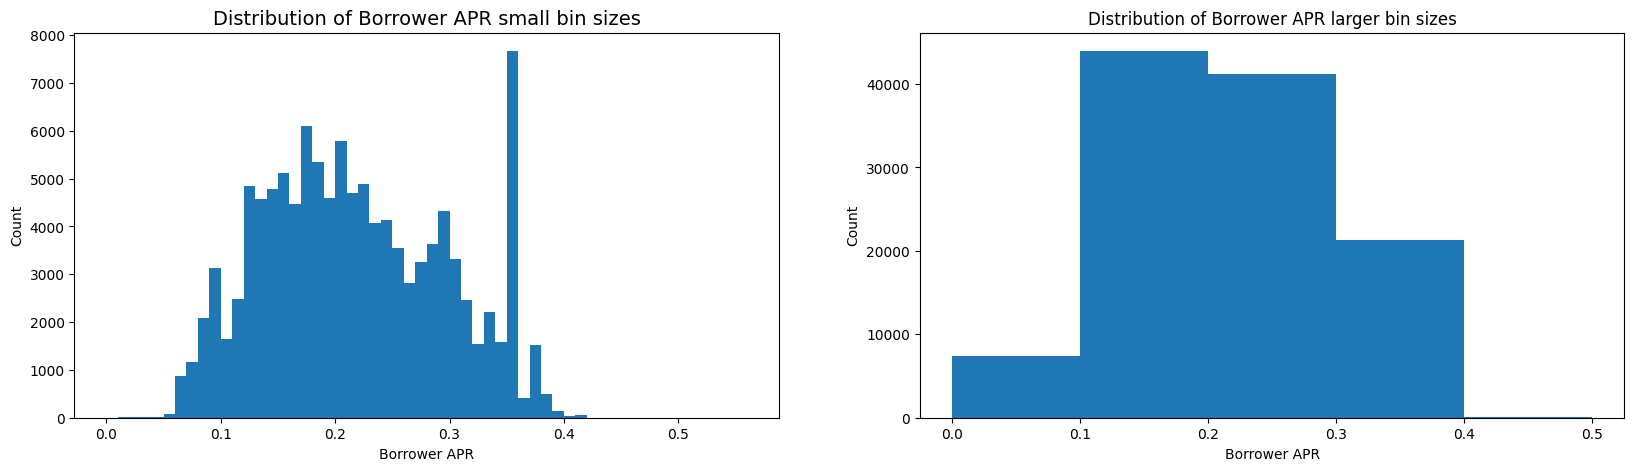

In [3]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Count');
plt.title('Distribution of Borrower APR small bin sizes',fontdict={'size':14});


# center plot: box plot
plt.subplot(1, 2, 2)
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.1)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Count');
plt.title('Distribution of Borrower APR larger bin sizes',fontdict={'size':12});

## Loan term and Borrower APR

The first slide shows a very weak negative relationship between borrower APR and loan term. I will however investigate further on how this two are affected bt another third feature

In [16]:
#Remove outlier values from Stated Monthly Income
df = df[df.StatedMonthlyIncome<=35000]

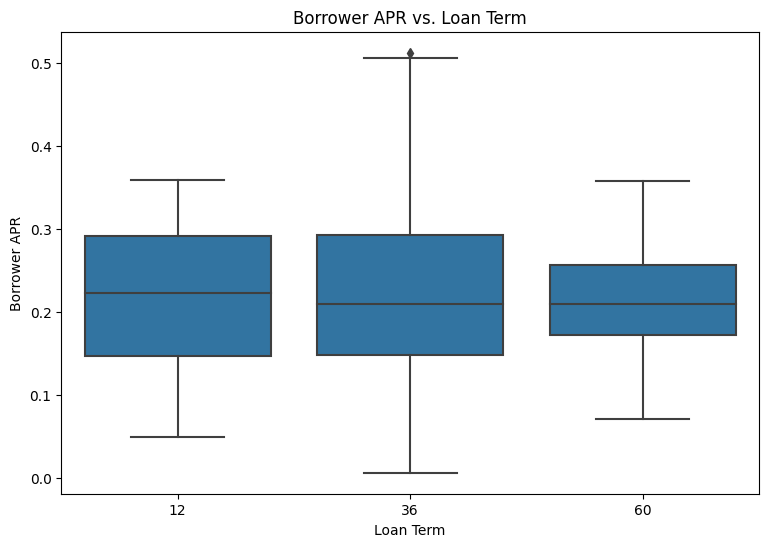

In [5]:
plt.figure(figsize=[9,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=df, x='Term', y='BorrowerAPR', color=default_color)
plt.xlabel('Loan Term')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Term');

## Loan Original Amount, Borrower APR and Loan Term

The plot shows that loan term tends to increase as original amount and borrowers APR increases. Although it has been obeserved that there appears to be very low negative relatiohsip between borrowers APR and Term, with loan amount increasing, a positive relationship is seen between term and Borrower APR. This relationship is however only observed for loan amount between 2000 and 25,000. This means that borrowers who take large amount within this limit is more likely to get a higher borrower APR  

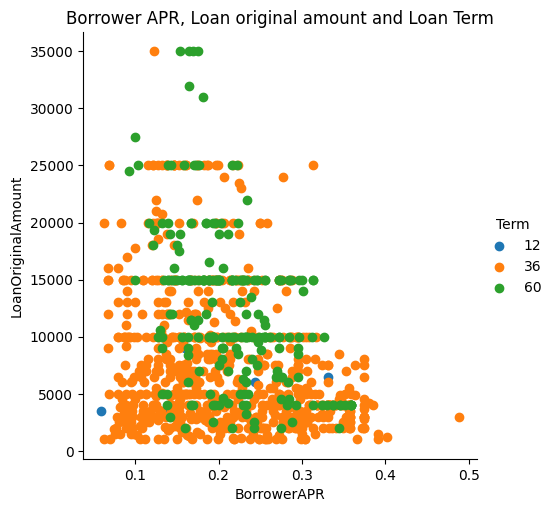

In [21]:
#plot a scatter plot of borrower apr and loan amount
df1= df.sample(1000)
g = sb.FacetGrid(data = df1, hue = 'Term', size = 5)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount')
g.add_legend()
plt.title('Borrower APR, Loan original amount and Loan Term', fontdict={'size':12});

## Loan Original Amount and Borrower APR

The graph shows a negative correlation between the loan original amount and Average borrower APR. This is because the APR tends to decrease as the loan amount increases which can be because of some sort of discount on obtaining more loans.

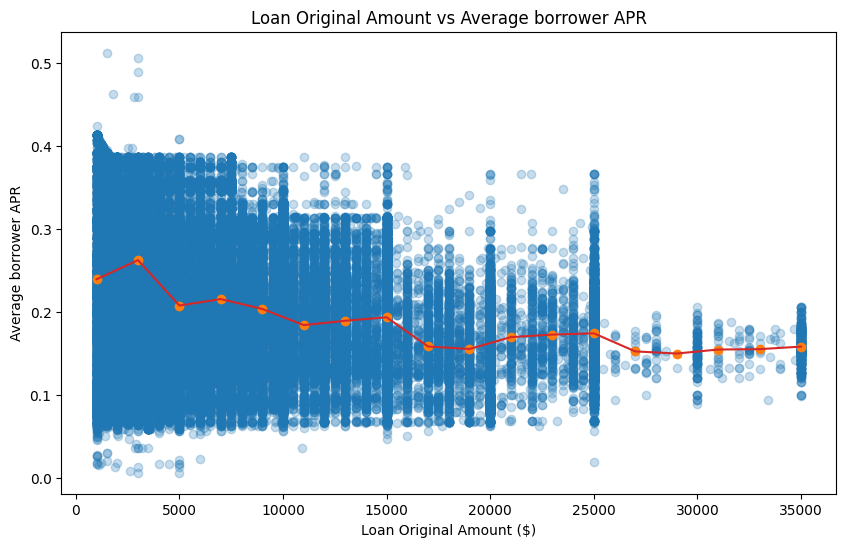

In [18]:
plt.figure(figsize=[ 10, 6])
bins_edges = np.arange(0,40000+100,2000)
bins_center = bins_edges[:-1]+1000
displ_binned = pd.cut(df['LoanOriginalAmount'], bins_edges, include_lowest = True)
comb_mean = df['BorrowerAPR'].groupby(displ_binned).mean()


# Plot the summarized data
line_color = sb.color_palette()[3]
plt.scatter(data=df,x='LoanOriginalAmount',y='BorrowerAPR',alpha=1/4)
plt.scatter(x=bins_center,y=comb_mean)
plt.errorbar(x = bins_center, y = comb_mean, c = line_color)

plt.title('Loan Original Amount vs Average borrower APR')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Average borrower APR');

## Borrower APR, Prosper Rating and Employment Status

The figure shows that there is a negative correlation between borrowers APR and Prosper rating as low BorrowerAPR correspond to high prosper rating. This means borrowers with higher prosper rating enjoys lower APR even as low as 8.8% for full-time and part-time high rated borrower. While a borrower with low rating can get APR as high as 36%.


In [19]:
# Convert ProsperRating to ordered categorical types
rating = ['HR','E','D','C','B','A','AA']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_cat)

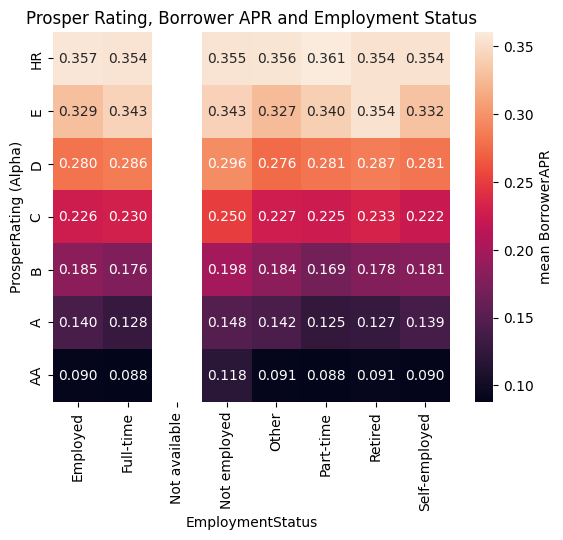

In [22]:
#generate 2d heatmap
cat_means = df.groupby(['EmploymentStatus', 'ProsperRating (Alpha)']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'BorrowerAPR_avg')
cat_means = cat_means.pivot(index = 'ProsperRating (Alpha)', columns = 'EmploymentStatus',
                            values = 'BorrowerAPR_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean BorrowerAPR'})
plt.title('Prosper Rating, Borrower APR and Employment Status', fontdict={'size':12});

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [10]:
!jupyter nbconvert slide_deck_omolayo.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 